In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
plt.rc('font', family='NanumGothic')

%config InlineBackend.figure_format = 'retina'
 
# !apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
# mpl.font_manager._rebuild()

domestic_flight = pd.read_csv('domestic_flight.csv', encoding= 'cp949')
domestic_passenger = pd.read_csv('domestic_passenger.csv', encoding= 'cp949')
flight = pd.read_csv('flight.csv', encoding= 'cp949')
passenger = pd.read_csv('passenger.csv', encoding= 'cp949')
jeju_passenger = pd.read_csv('jeju_passenger.csv', encoding= 'cp949')

## 데이터 설명


1. domestic_flight, domestic_passenger.csv : [공항별항공통계서비스]

출처 : 공공데이터포털 - 인천공항 공항별 항공통계 서비스

내용 : 국내선 출,도착 정기 운항 항공편과 승객 수에 관한 데이터

범위 : 2019년 11월 ~ 2020년 3월(월간 데이터)



2. flight, passenger.csv : [국가별항공통계서비스]

출처 : 공공데이터포털 - 인천공항 국가별 항공통계 서비스

내용 : 인천공항 출,도착 정기 운항 항공편과 승객 수에 관한 데이터

범위 : 2019년 11월 ~ 2020년 3월(월간 데이터)



3. jeju_passenger.csv : [일별 예상승객 정보]

출처 : 공공데이터포털 - 한국공항공사 일별 예상승객정보 및 혼잡여부

내용 : 국내선 제주공항 일일 승객 수에 관한 데이터

범위 : 2020년 1월 ~ 2020년 3월(일간 데이터)



* XML 데이터를 크롤링해서 데이터프레임으로 변환 후 csv 형식으로 저장한 파일이다.
* 공공데이터포털에서 인증키를 받아와서 코드를 작성한 부분은 비공개 합니다.

In [2]:
domestic_flight.shape

(36, 6)

In [3]:
domestic_flight.head(10)

,Unnamed: 0,month,airport,arrFlight,depFlight,flights
0,0,201911,김포,817,817,1634
1,1,201911,김해,2269,2272,4541
2,2,201911,대구,561,562,1123
3,3,201911,무안,124,124,248
4,4,201911,인천,14232,14240,28472
5,5,201911,제주,769,765,1534
6,6,201911,청주,113,114,227
7,7,201912,김포,868,868,1736
8,8,201912,김해,2485,2478,4963
9,9,201912,대구,543,546,1089


month : 연도(4)+월(2)

airport : 공항명

arrFlight : 월간 총 출발 항공편 수

depFlight : 월간 총 도착 항공편 수

flights : 월간 총 항공편 수

In [4]:
# 첫 번째 열 삭제
domestic_flight = domestic_flight.drop(domestic_flight.columns[[0]], axis = 1)

XML 데이터를 전처리해서 csv 파일로 저장하니까 원래 없었던 첫 번째 열이 포함되어 저장되었다.

drop을 이용해 1열을 삭제한다.

In [5]:
# 나머지 데이터도 위와 같이 삭제한다.
domestic_passenger = domestic_passenger.drop(domestic_passenger.columns[[0]], axis = 1)
flight = flight.drop(flight.columns[[0]], axis = 1)
passenger = passenger.drop(passenger.columns[[0]], axis = 1)
jeju_passenger = jeju_passenger.drop(jeju_passenger.columns[[0]], axis = 1)

In [6]:
domestic_passenger.shape

(36, 5)

In [7]:
domestic_passenger.head(10)

,month,airport,arrival,departure,passenger
0,201911,김포,168516,169641,338157
1,201911,김해,337633,344337,681970
2,201911,대구,76989,80114,157103
3,201911,무안,18981,19240,38221
4,201911,인천,2696930,2775548,5472478
5,201911,제주,109894,107351,217245
6,201911,청주,12705,12116,24821
7,201912,김포,176265,170656,346921
8,201912,김해,372490,382448,754938
9,201912,대구,79550,81817,161367


month : 연도(4)+월(2)

airport : 공항명

arrival : 월간 총 출발 승객 수

departure : 월간 총 도착 승객 수

passsenger : 월간 총 승객 수

In [8]:
flight.shape

(280, 6)

In [9]:
flight.head(10)

,month,arrFlight,depFlight,flights,country,region
0,201911,17,18,35,네팔,기타
1,201911,13,13,26,몰디브,기타
2,201911,0,0,0,스리랑카,기타
3,201911,30,21,51,에티오피아,기타
4,201911,60,60,120,인도,기타
5,201911,236,236,472,괌,대양주
6,201911,34,34,68,뉴질랜드,대양주
7,201911,159,159,318,사이판,대양주
8,201911,23,22,45,팔라우,대양주
9,201911,112,112,224,하와이,대양주


month : 연도(4)+월(2)

arrFlight : 월간 총 입국 항공편 수

depFlight : 월간 총 출국 항공편 수

flights : 월간 총 항공편 수

country : 국가명

region : 지역 구분

In [10]:
passenger.shape

(280, 6)

In [11]:
passenger.head(10)

,month,arrival,departure,passenger,country,region
0,201911,2428,2230,4658,네팔,기타
1,201911,1520,1513,3033,몰디브,기타
2,201911,789,1191,1980,스리랑카,기타
3,201911,1797,2183,3980,에티오피아,기타
4,201911,9495,9528,19023,인도,기타
5,201911,45424,46348,91772,괌,대양주
6,201911,7558,8011,15569,뉴질랜드,대양주
7,201911,20852,22432,43284,사이판,대양주
8,201911,1325,1293,2618,팔라우,대양주
9,201911,20709,21748,42457,하와이,대양주


month : 연도(4)+월(2)

arrival : 월간 총 입국 승객 수

departure : 월간 총 출국 승객 수

passenger : 월간 총 승객 수

country : 국가명

region : 지역 구분

In [12]:
jeju_passenger.shape

(91, 2)

In [13]:
jeju_passenger.head(10)

,date,passenger
0,2020-01-01,24647
1,2020-01-02,30655
2,2020-01-03,26189
3,2020-01-04,32569
4,2020-01-05,29914
5,2020-01-06,26265
6,2020-01-07,25463
7,2020-01-08,24831
8,2020-01-09,26020
9,2020-01-10,24306


date : 날짜

passenger : 일일 승객 수

In [14]:
# 국내선 항공편, 승객 수 병합
domestic = pd.merge(domestic_flight, domestic_passenger, on=['month','airport'])

In [15]:
# 국제선 항공편, 승객 수 병합
international = pd.merge(flight, passenger, on =['month','country','region'])

In [16]:
domestic.head()

,month,airport,arrFlight,depFlight,flights,arrival,departure,passenger
0,201911,김포,817,817,1634,168516,169641,338157
1,201911,김해,2269,2272,4541,337633,344337,681970
2,201911,대구,561,562,1123,76989,80114,157103
3,201911,무안,124,124,248,18981,19240,38221
4,201911,인천,14232,14240,28472,2696930,2775548,5472478


In [17]:
# 국내 공항
domestic['airport'].value_counts()

제주    5
인천    5
김포    5
무안    5
김해    5
대구    4
청주    4
양양    3
Name: airport, dtype: int64

In [18]:
international.head()

,month,arrFlight,depFlight,flights,country,region,arrival,departure,passenger
0,201911,17,18,35,네팔,기타,2428,2230,4658
1,201911,13,13,26,몰디브,기타,1520,1513,3033
2,201911,0,0,0,스리랑카,기타,789,1191,1980
3,201911,30,21,51,에티오피아,기타,1797,2183,3980
4,201911,60,60,120,인도,기타,9495,9528,19023


In [19]:
# 인천공항에서 취항하는 국가
international['country'].value_counts()

괌         5
라오스       5
대만        5
폴란드       5
호주        5
이탈리아      5
캄보디아      5
영국        5
필리핀       5
말레이시아     5
캐나다       5
체코        5
독일        5
오스트리아     5
미얀마       5
카자흐스탄     5
사이판       5
뉴질랜드      5
브라질       5
팔라우       5
네덜란드      5
아제르바이잔    5
인도        5
스리랑카      5
터키        5
헝가리       5
러시아       5
몽골        5
일본        5
노르웨이      5
에티오피아     5
프랑스       5
중국        5
인도네시아     5
하와이       5
홍콩        5
스웨덴       5
카타르       5
멕시코       5
페루        5
네팔        5
벨기에       5
브루나이      5
스페인       5
미국        5
아랍에미리트    5
싱가포르      5
베트남       5
태국        5
칠레        5
핀란드       5
몰디브       5
룩셈부르크     5
이스라엘      4
우즈베키스탄    4
마카오       4
키르기즈스탄    1
크로아티아     1
스위스       1
Name: country, dtype: int64

In [20]:
# 대륙별 구분
international['region'].value_counts()

유럽     102
동남아     50
대양주     30
미주      30
기타      25
동북아     19
중동      14
일본       5
중국       5
Name: region, dtype: int64

## 승객 및 항공편 시각화

### 1. 월간 국내선 - 사회적 거리두기 1

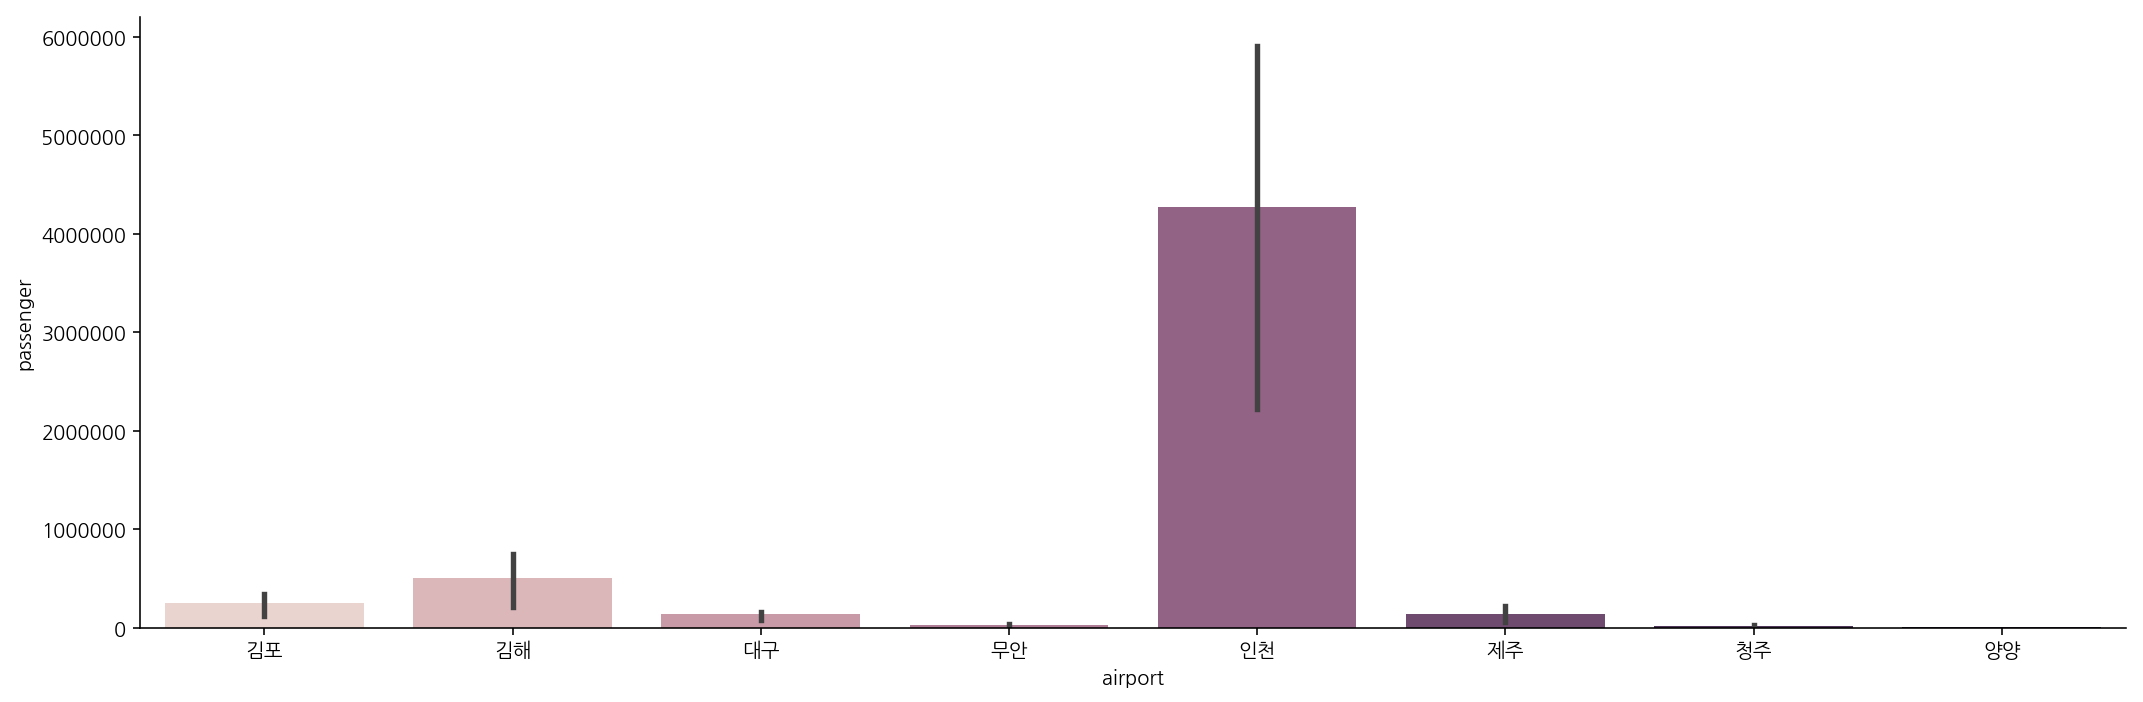

In [21]:
# 국내선 월 평균 승객 수
sns.catplot(x="airport", y="passenger", palette="ch:.0", data=domestic, kind="bar", aspect=3)

국내선은 김포가 많을 것으로 예상했지만 인천이 가장 많았다.

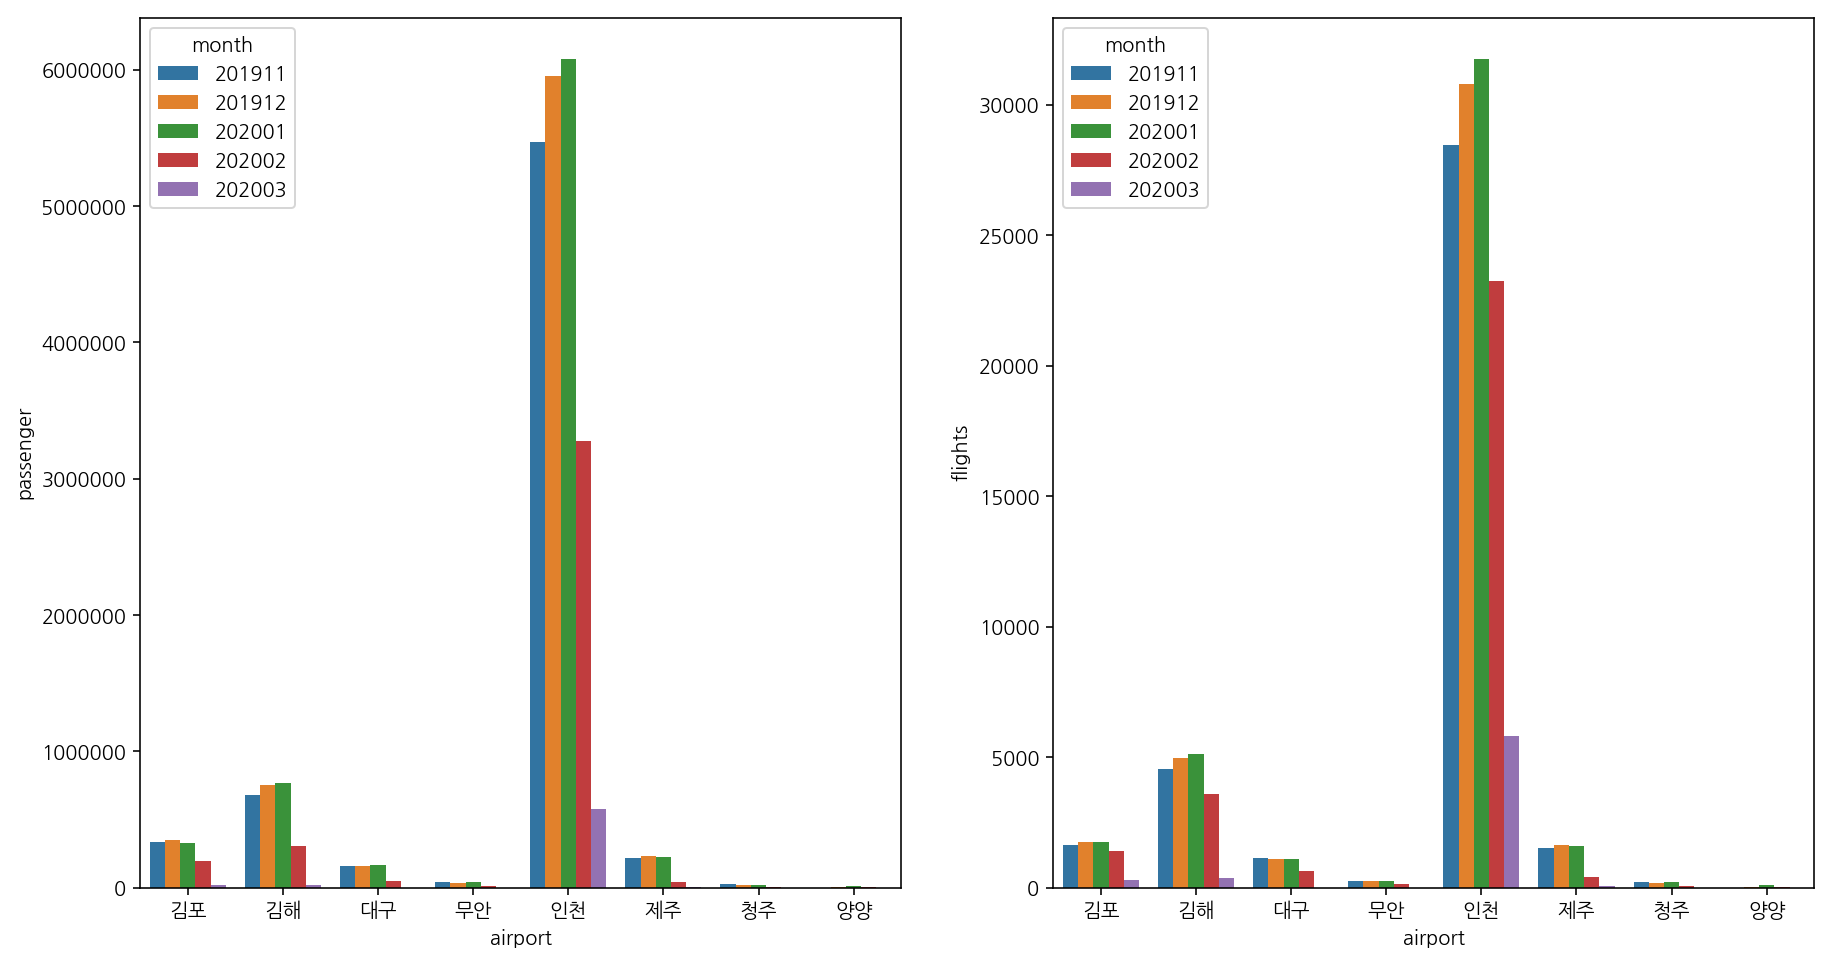

In [22]:
# 월간 국내선 승객, 항공편 수 비교
fig, ax = plt.subplots(ncols=2)
fig.set_size_inches(15, 8)
sns.barplot(x='airport', y= 'passenger', hue='month', data=domestic, ax = ax[0])
sns.barplot(x='airport', y= 'flights', hue='month', data=domestic, ax = ax[1])

좌측은 승객 수, 우측은 항공편 수이다.

이용자가 가장 많은 인천공항을 중심으로 살펴보자.

인천공항 이용자가 2019년 11월부터 2020년 1월까지 6백만 명을 넘을 정도로 증가했다.
1월까지는 겨울 성수기인 만큼 지속적으로 이용자가 증가했다고 볼 수 있다.
하지만 코로나로 인해 2020년 2월은 3백만 명을 겨우 넘는 승객만 공항을 이용했다.
3월 인천국제 공항 이용자 수는 백만 명도 되지 않는다.

인천공항의 항공편 역시 2020년 1월까지는 3만 편이 넘게 운항될 정도로 증가했다.
겨울 성수기에 맞춰 항공편을 증가시킨 것으로 보인다.
그러나 코로나의 확산을 방지하기 위해 7~80% 가까이 운항편을 줄였음을 확인할 수 있다.

### 2. 월간 국제선 - 중국 입출국 승객 + 입국금지 국가 확인

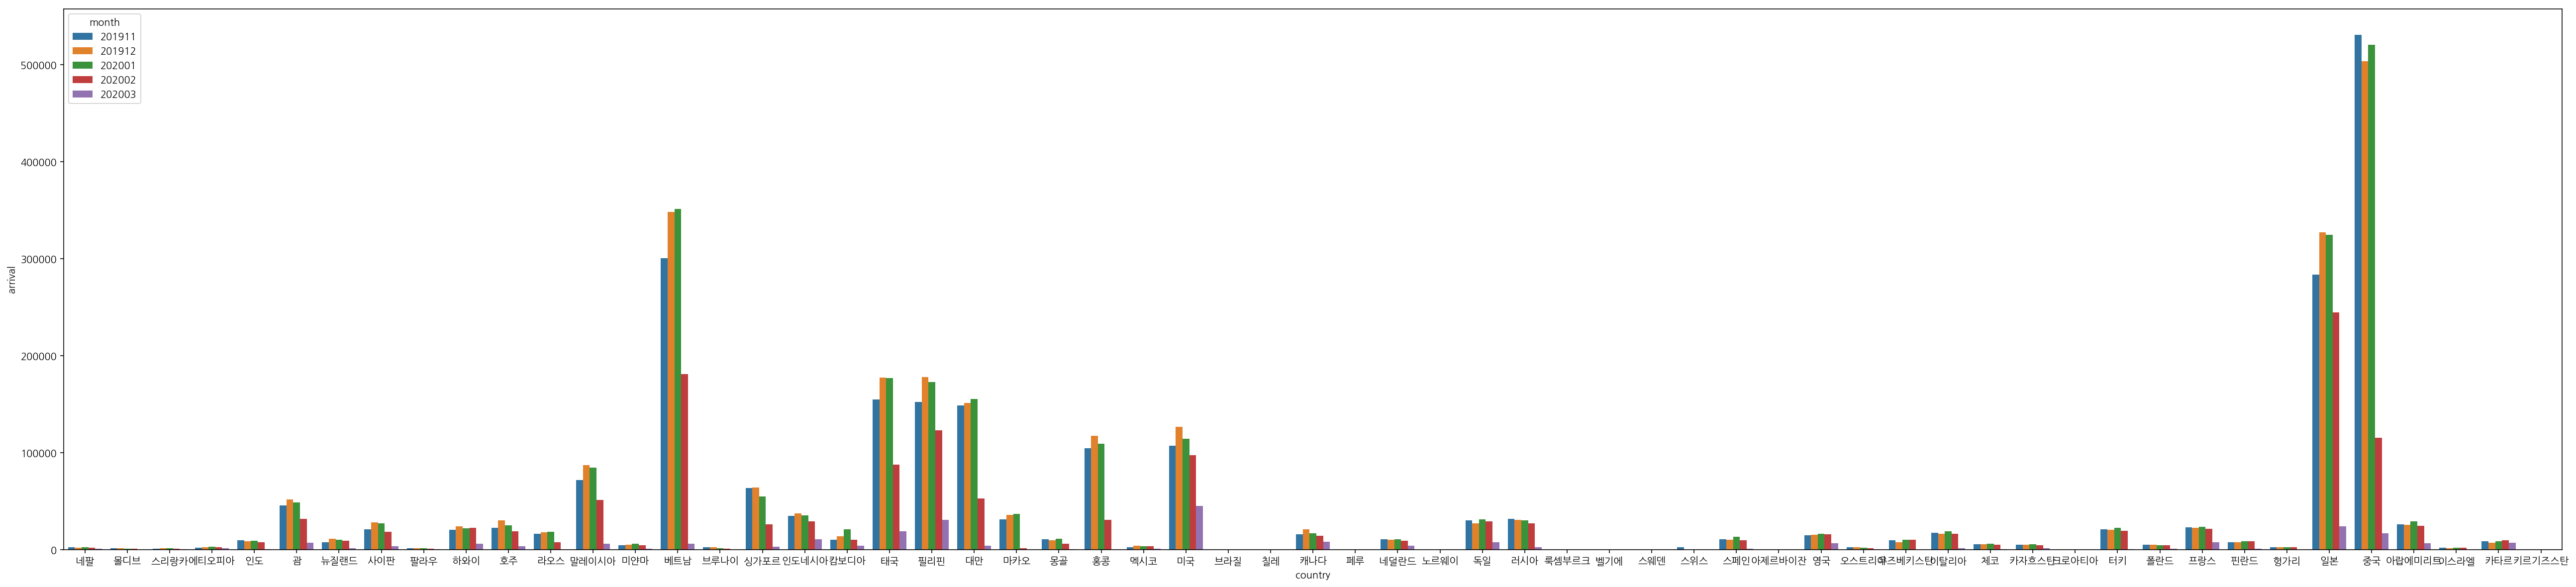

In [23]:
# 월간 입국 승객
fig,ax = plt.subplots()
fig.set_size_inches(45,10)
sns.barplot(x='country', y= 'arrival', hue='month', data=international)

확대해서 자세히 보면 중국, 일본, 베트남 순으로 승객이 많다.
우리나라와 가깝고 가기 쉬운 나라인 만큼 이용자가 많다.
2019년 11월부터 2020년 1월까지 중국 입출국 승객 수는 조금씩 감소해도 50만 명이 넘도록 많았다.
그런데, 2020년 2월 10만명이 겨우 넘을 정도로 중국 관련 승객이 대폭 감소했다.
3월에는 1만명 가량으로 감소함을 보인다.
코로나의 파급력이 엄청남을 알 수 있다.

중국과 국경선이 맞닿아있는 베트남 역시 2월 기준으로 30만에서 20만 정도로 감소했다.
3월에는 베트남 항공편 승객 수가 엄청나게 감소했다.

일본 역시 2월까지는 중국과 베트남에 비해 양호한 편이었다.
3월에 접어든 후 코로나의 영향을 피하지 못한 것은 마찬가지다.



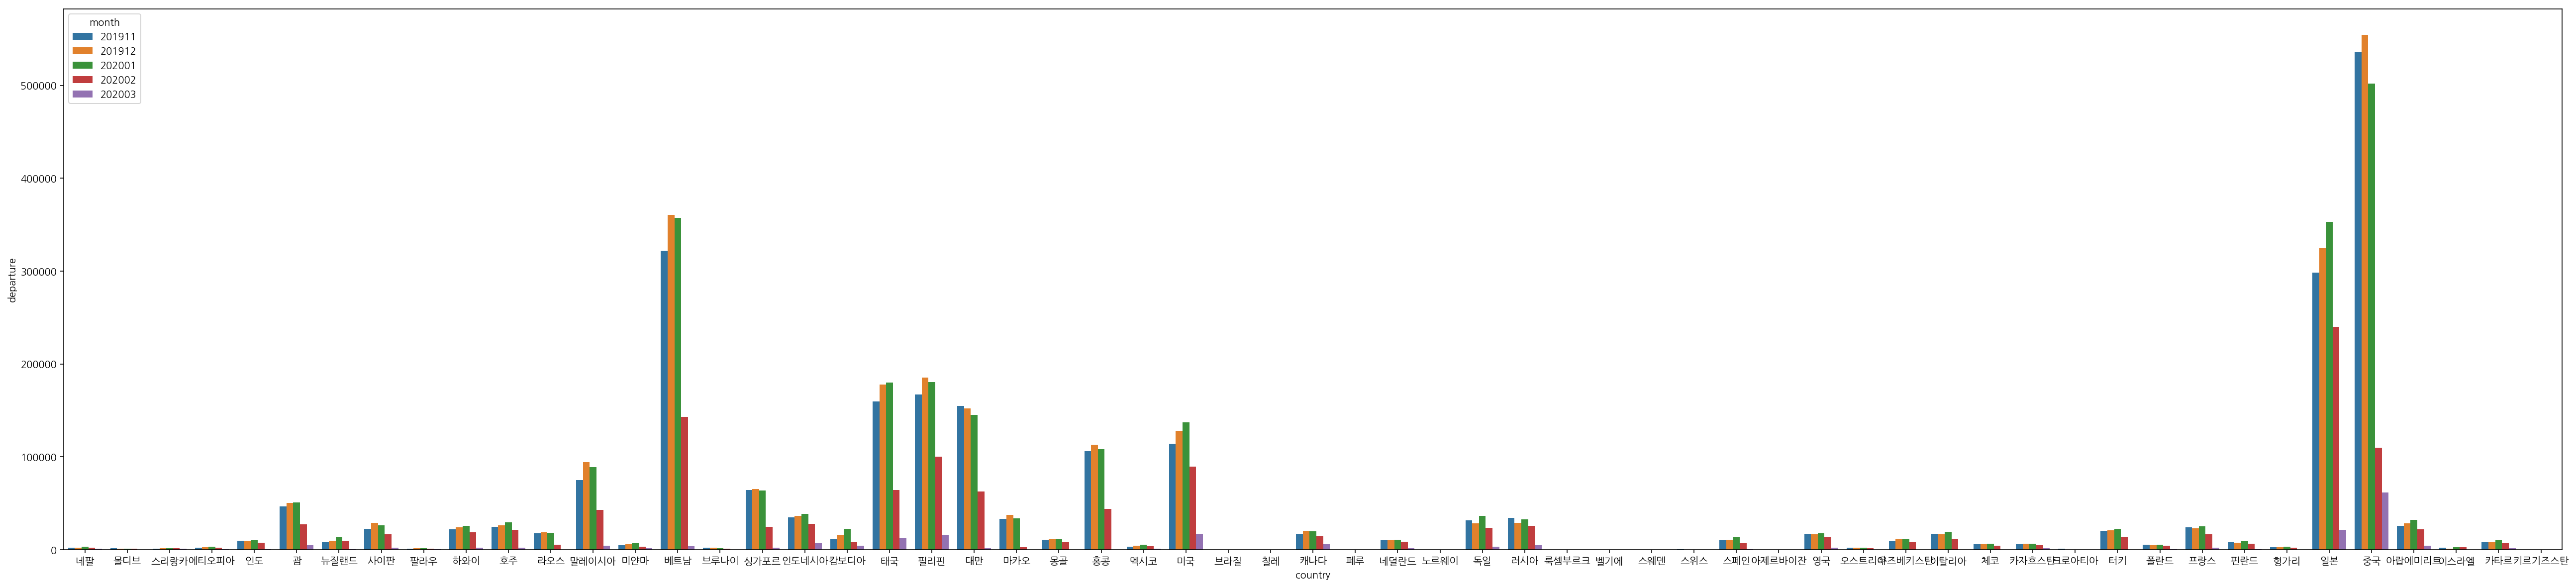

In [24]:
# 월간 출국 승객
fig,ax = plt.subplots()
fig.set_size_inches(45,10)
sns.barplot(x='country', y= 'departure', hue='month', data=international)

아시아 국가 중 우리나라 입국 금지 국가 : 말레이시아, 싱가포르, 몽골

3월 승객 수가 대폭 줄어 그래프 확대를 해도 자세히 보이지 않는다.

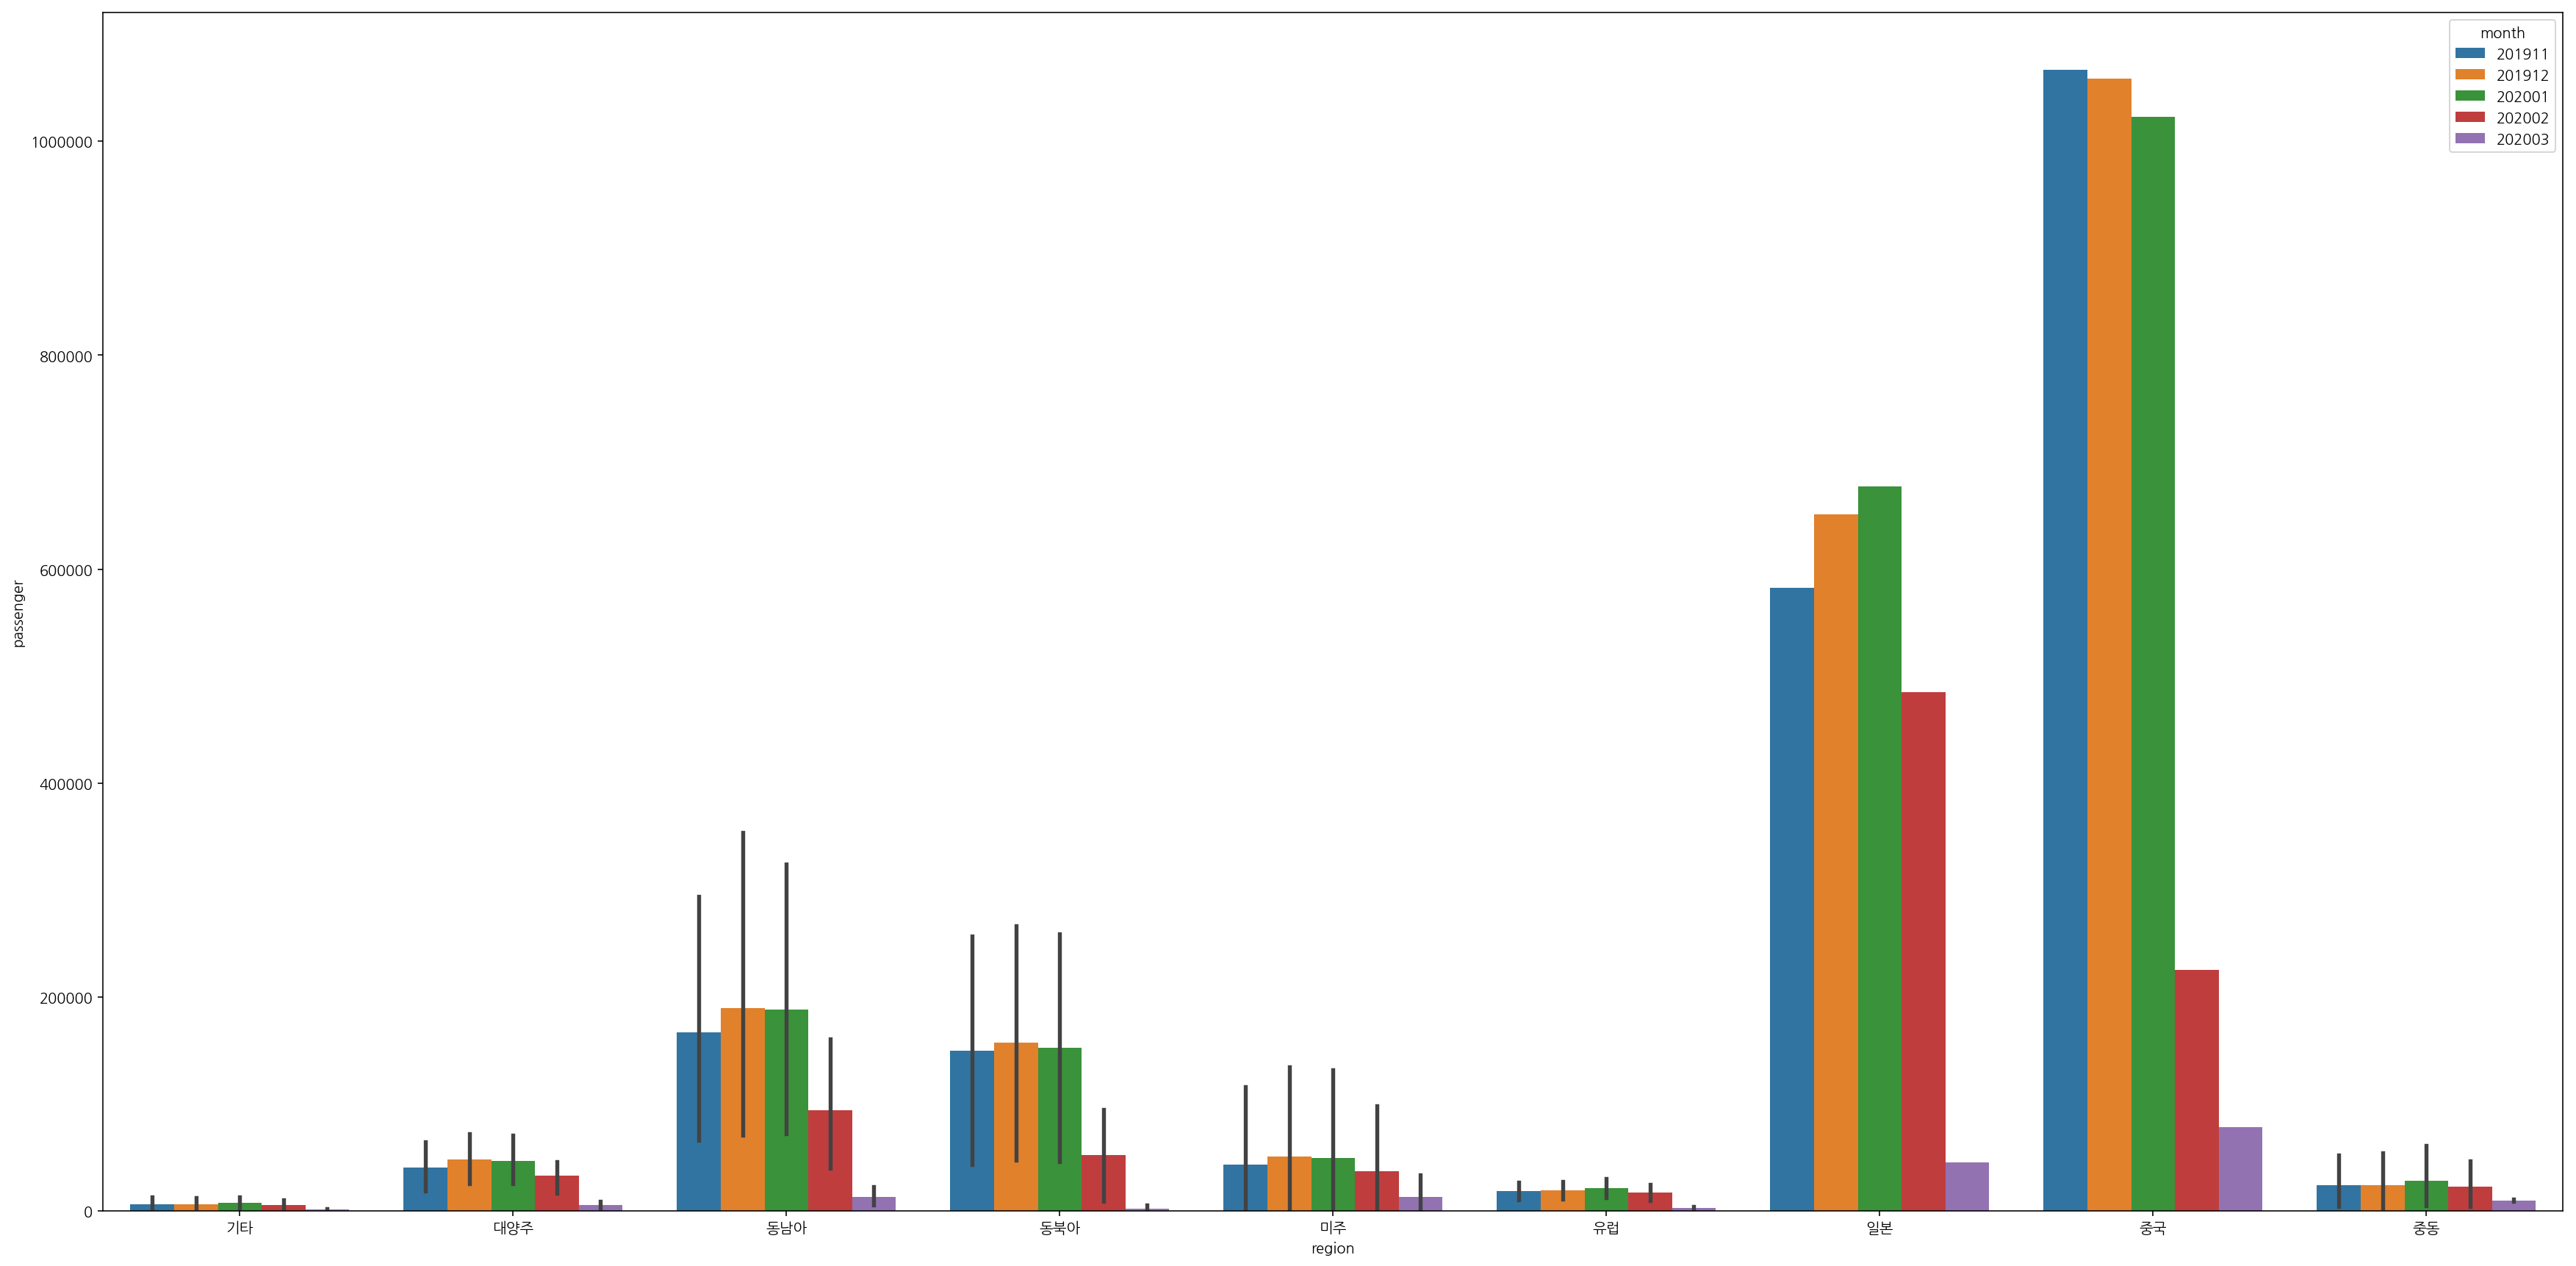

In [25]:
# 입출국 통합 대륙별
fig,ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x='region', y= 'passenger', hue='month', data=international)

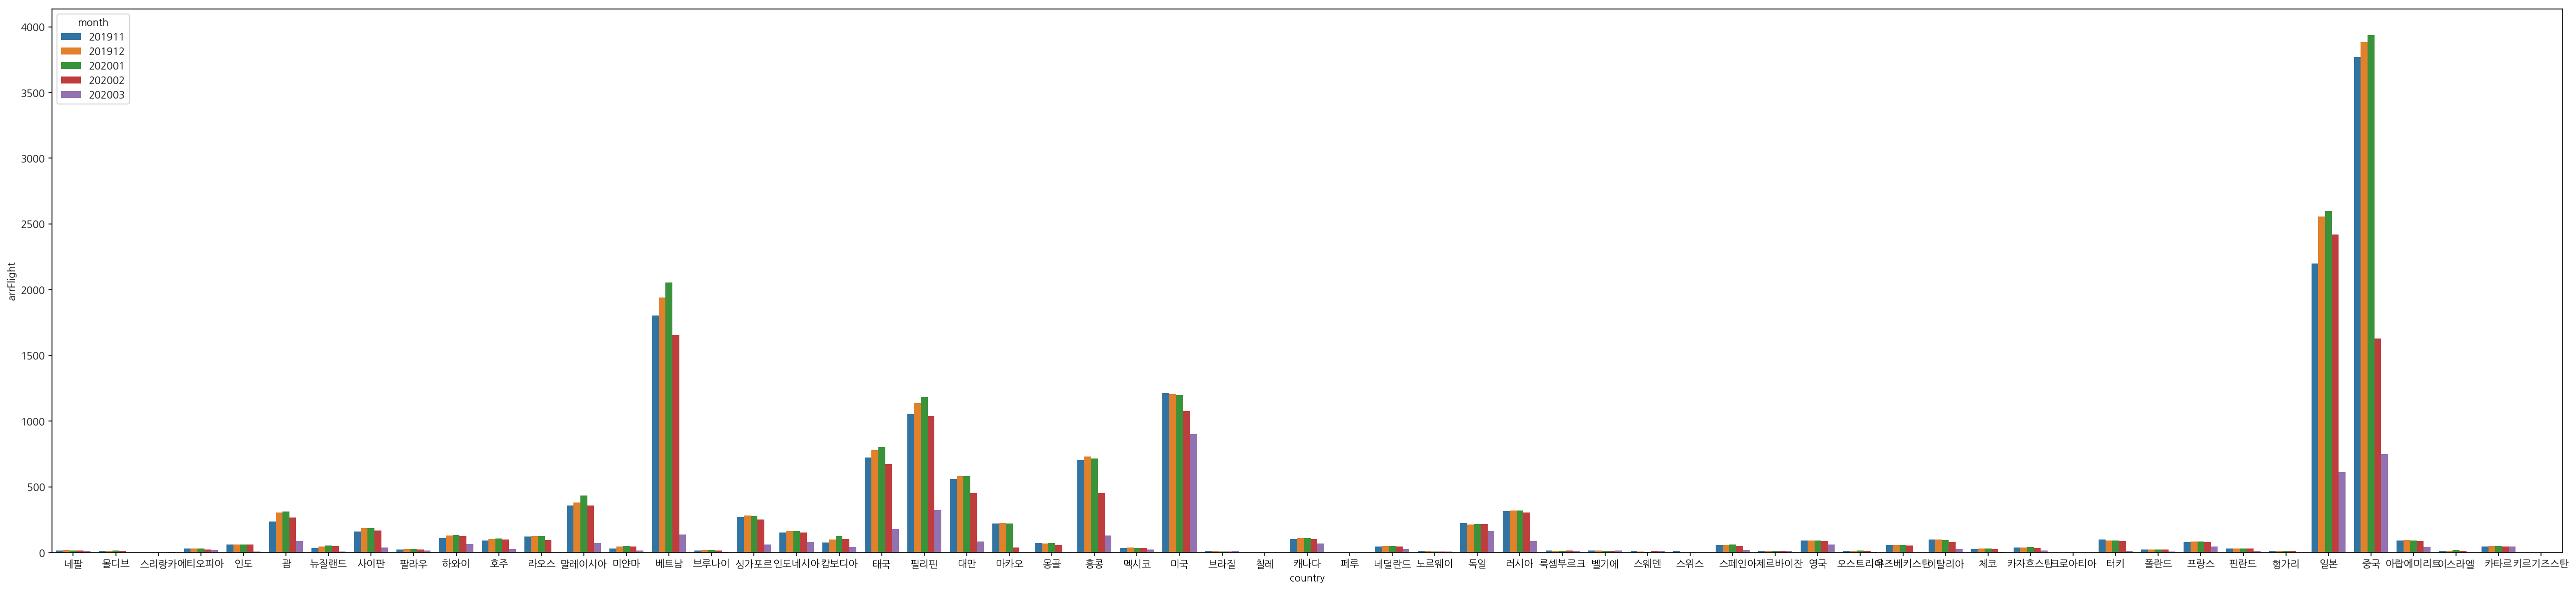

In [26]:
# 월간 입국 항공편
fig,ax = plt.subplots()
fig.set_size_inches(45,10)
sns.barplot(x='country', y= 'arrFlight', hue='month', data=international)

월간 승객 수와 유사하게 입국 항공편 수도 감소했다.

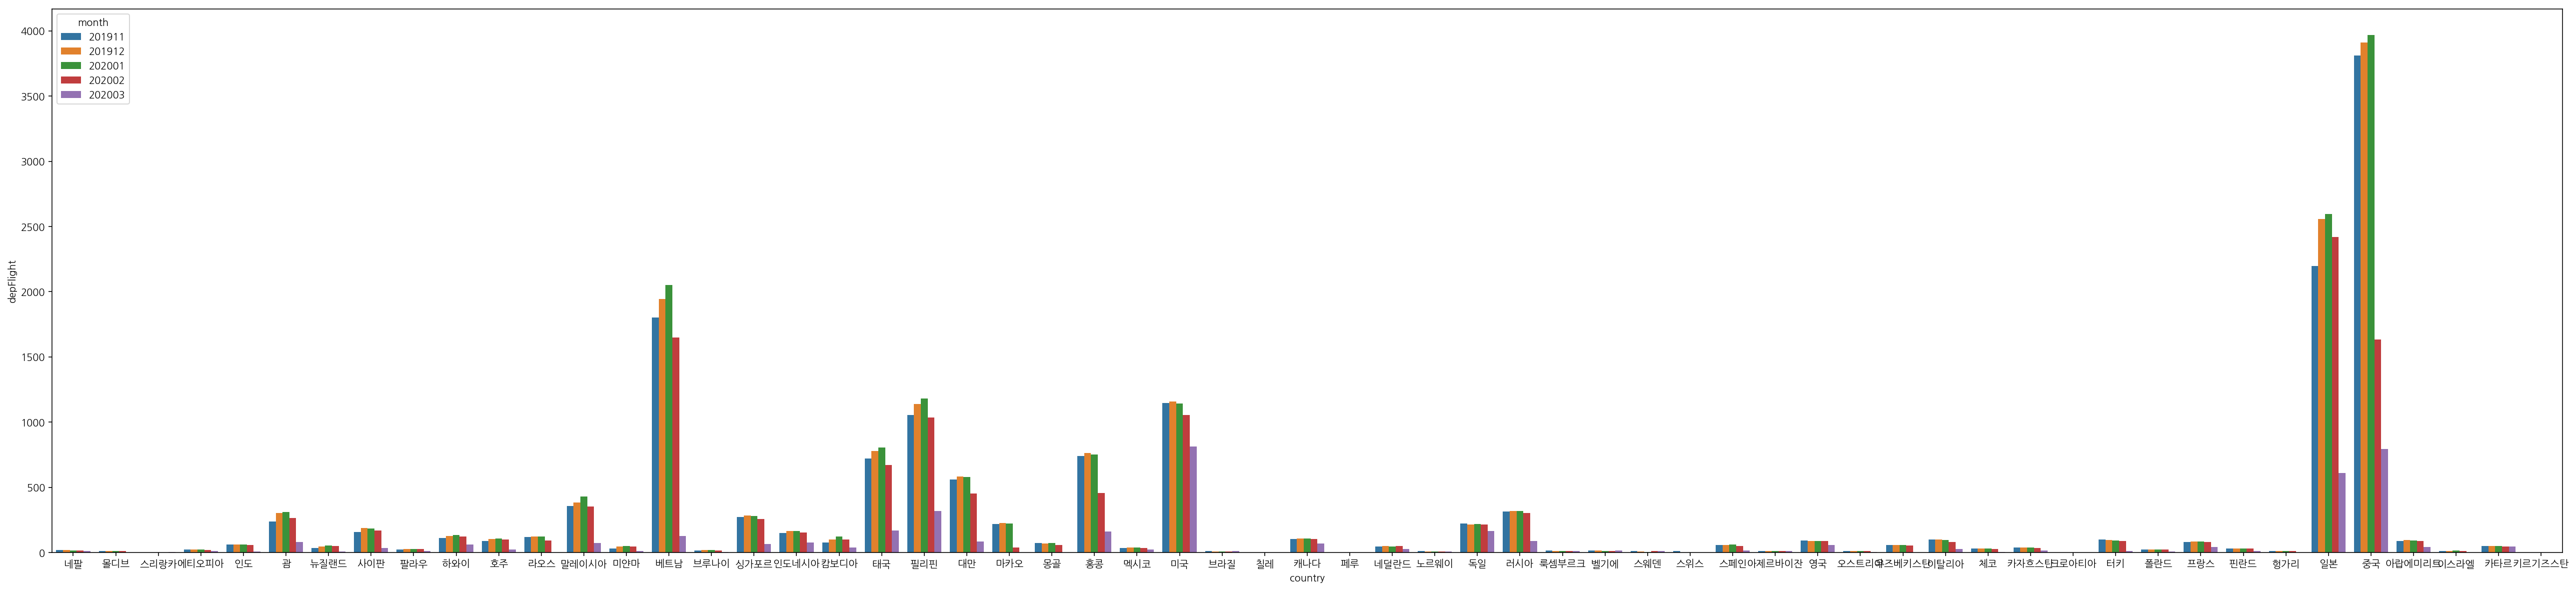

In [27]:
# 월간 출국 항공편
fig,ax = plt.subplots()
fig.set_size_inches(45,10)
sns.barplot(x='country', y= 'depFlight', hue='month', data=international)

위의 각 국가별로 나타난 그래프를 대륙별로 좁혀 만든 그래프다.
기타 국가, 대양주, 미주, 유럽, 중동 국가는 기본적으로 다른 노선에 비해 승객이 적은 편이라 코로나의 영향을 파악하기는 어렵다.
하지만, 동남아와 동북아를 보면 일본, 중국만큼 이용자 수가 많지 않아도 코로나의 영향을 받았음을 확인할 수 있다.

항공편 역시 중국, 일본, 베트남 순이다.
코로나의 영향으로 인해 중국 노선은 절반 가까이 줄었다.
그에 비해 일본이나 베트남 노선은 2019년 11월과 유사하다.

중국에서 시작된 전염성이라 그런지 노선 수에 비해 승객 수가 훨씬 더 줄었음을 눈으로 확인할 수 있다.

우리나라 입국을 막은 국가에 대해서는 항공편도 입.출국을 합해 이전의 10%도 되지 않는 형상을 보인다.

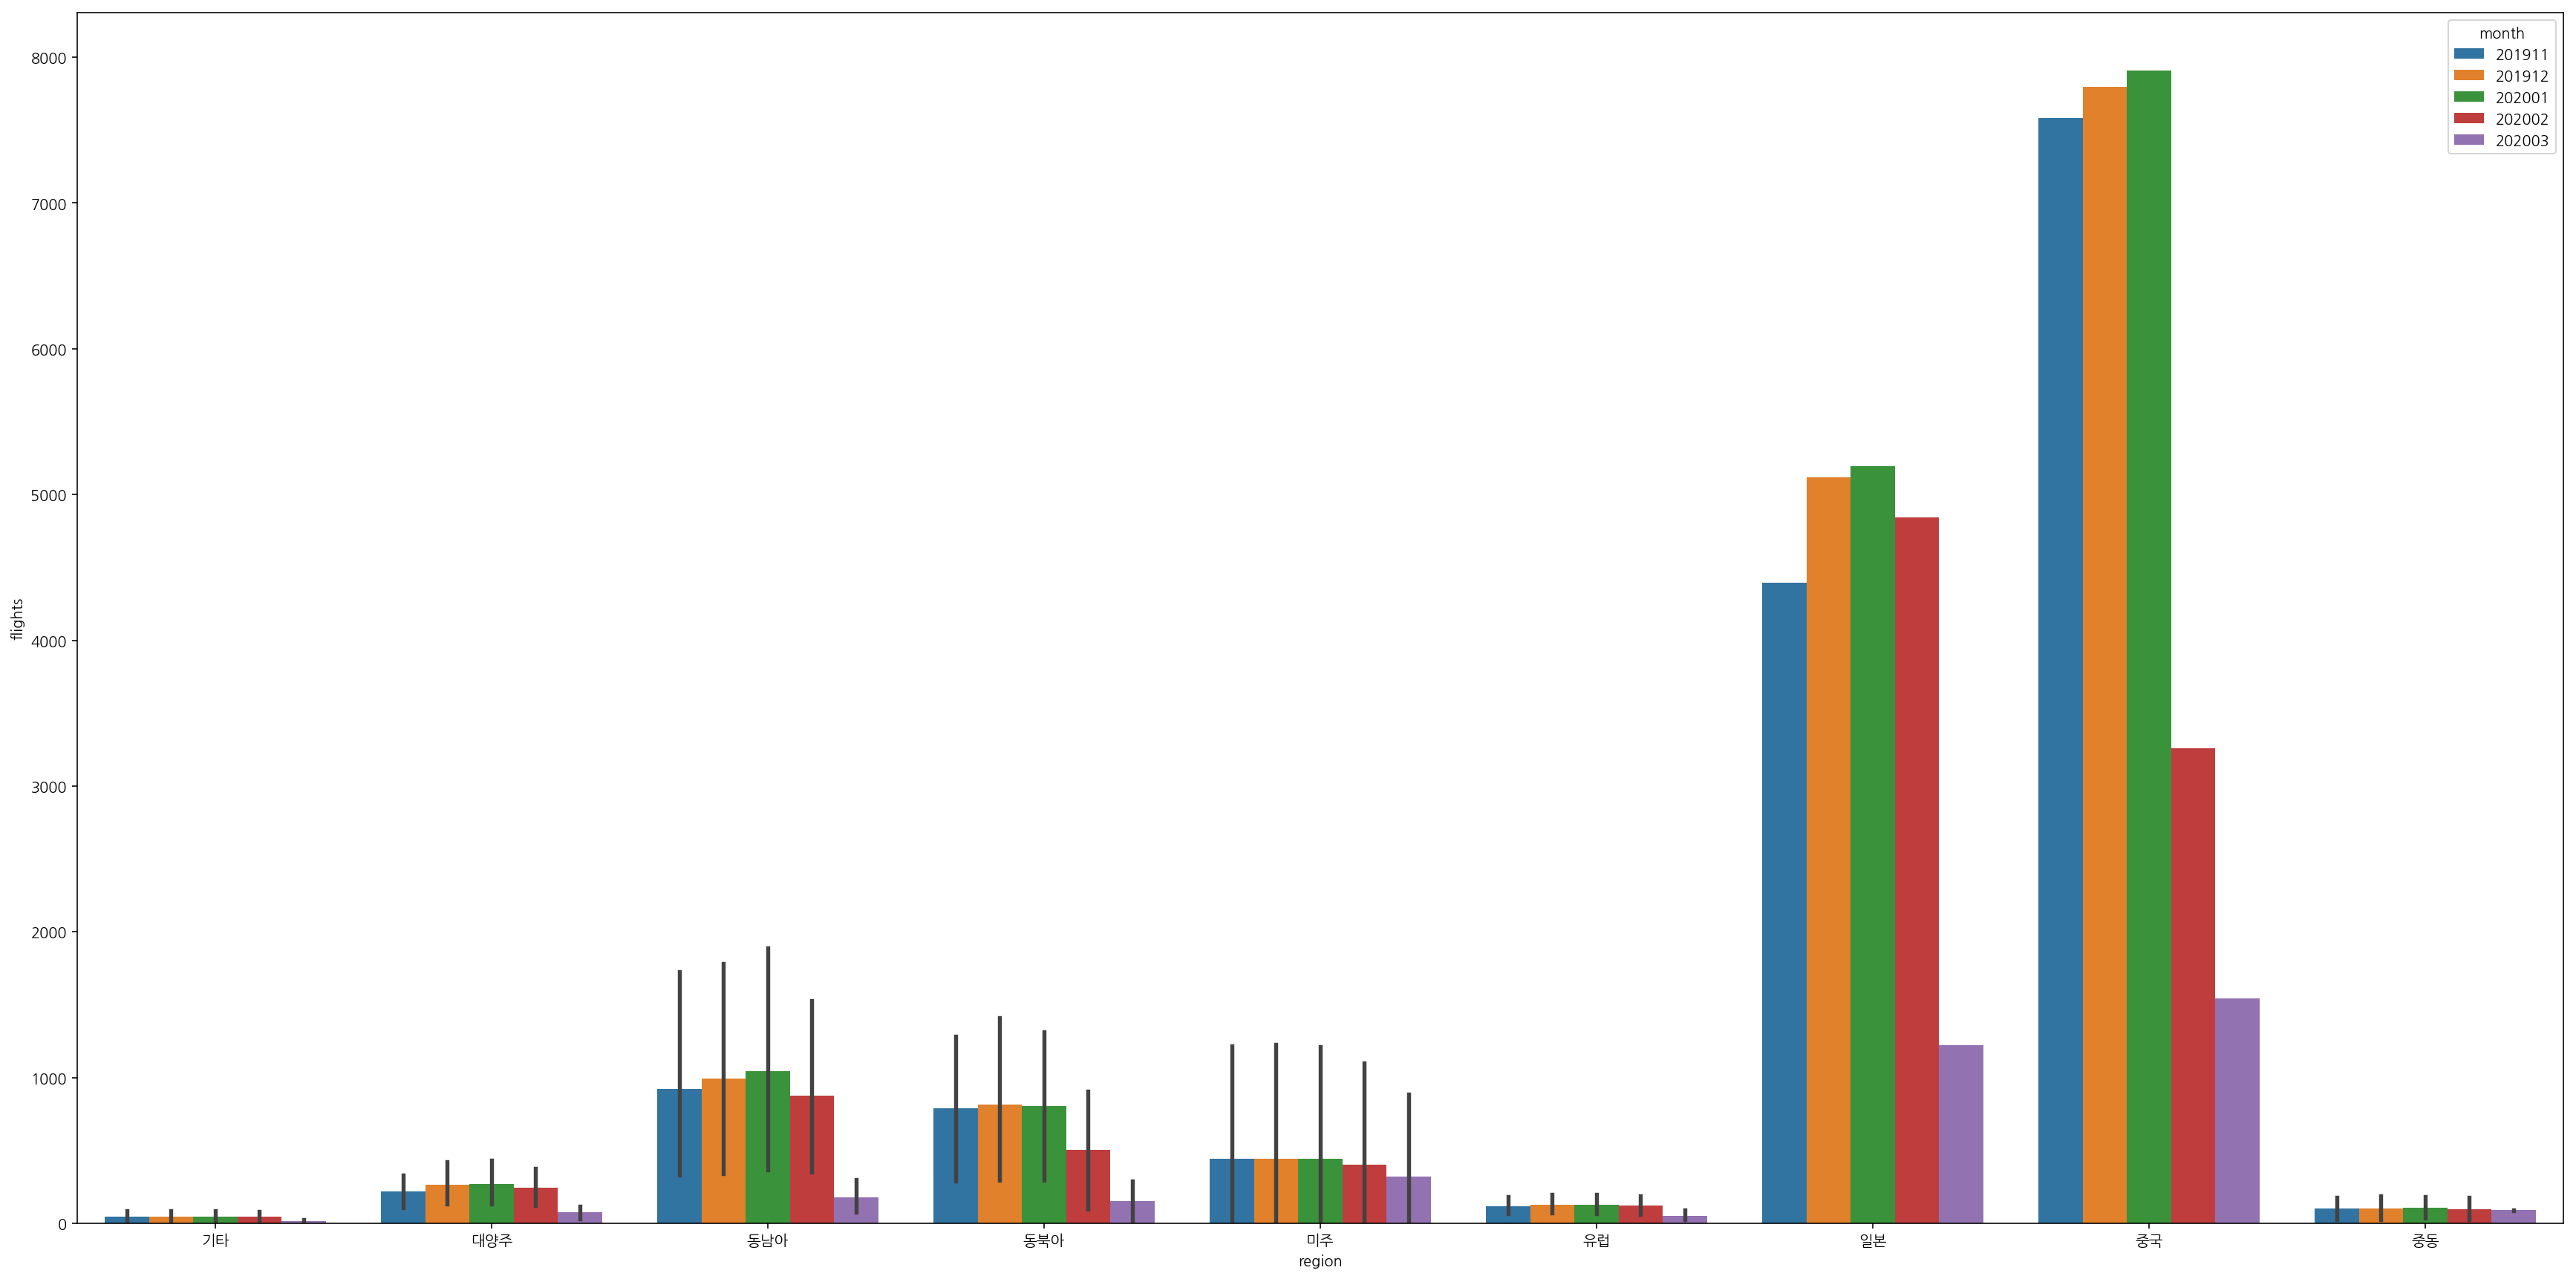

In [28]:
# 입출국 통합 대륙별
fig,ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x='region', y= 'flights', hue='month', data=international)

대륙별로 묶어서 확인하면 중국과 인접한 아시아권이나 대양주 및 유럽 이외에는 특별히 노선 수가 감소한 지역은 없다.

### 3. 일간 제주공항(국내선)

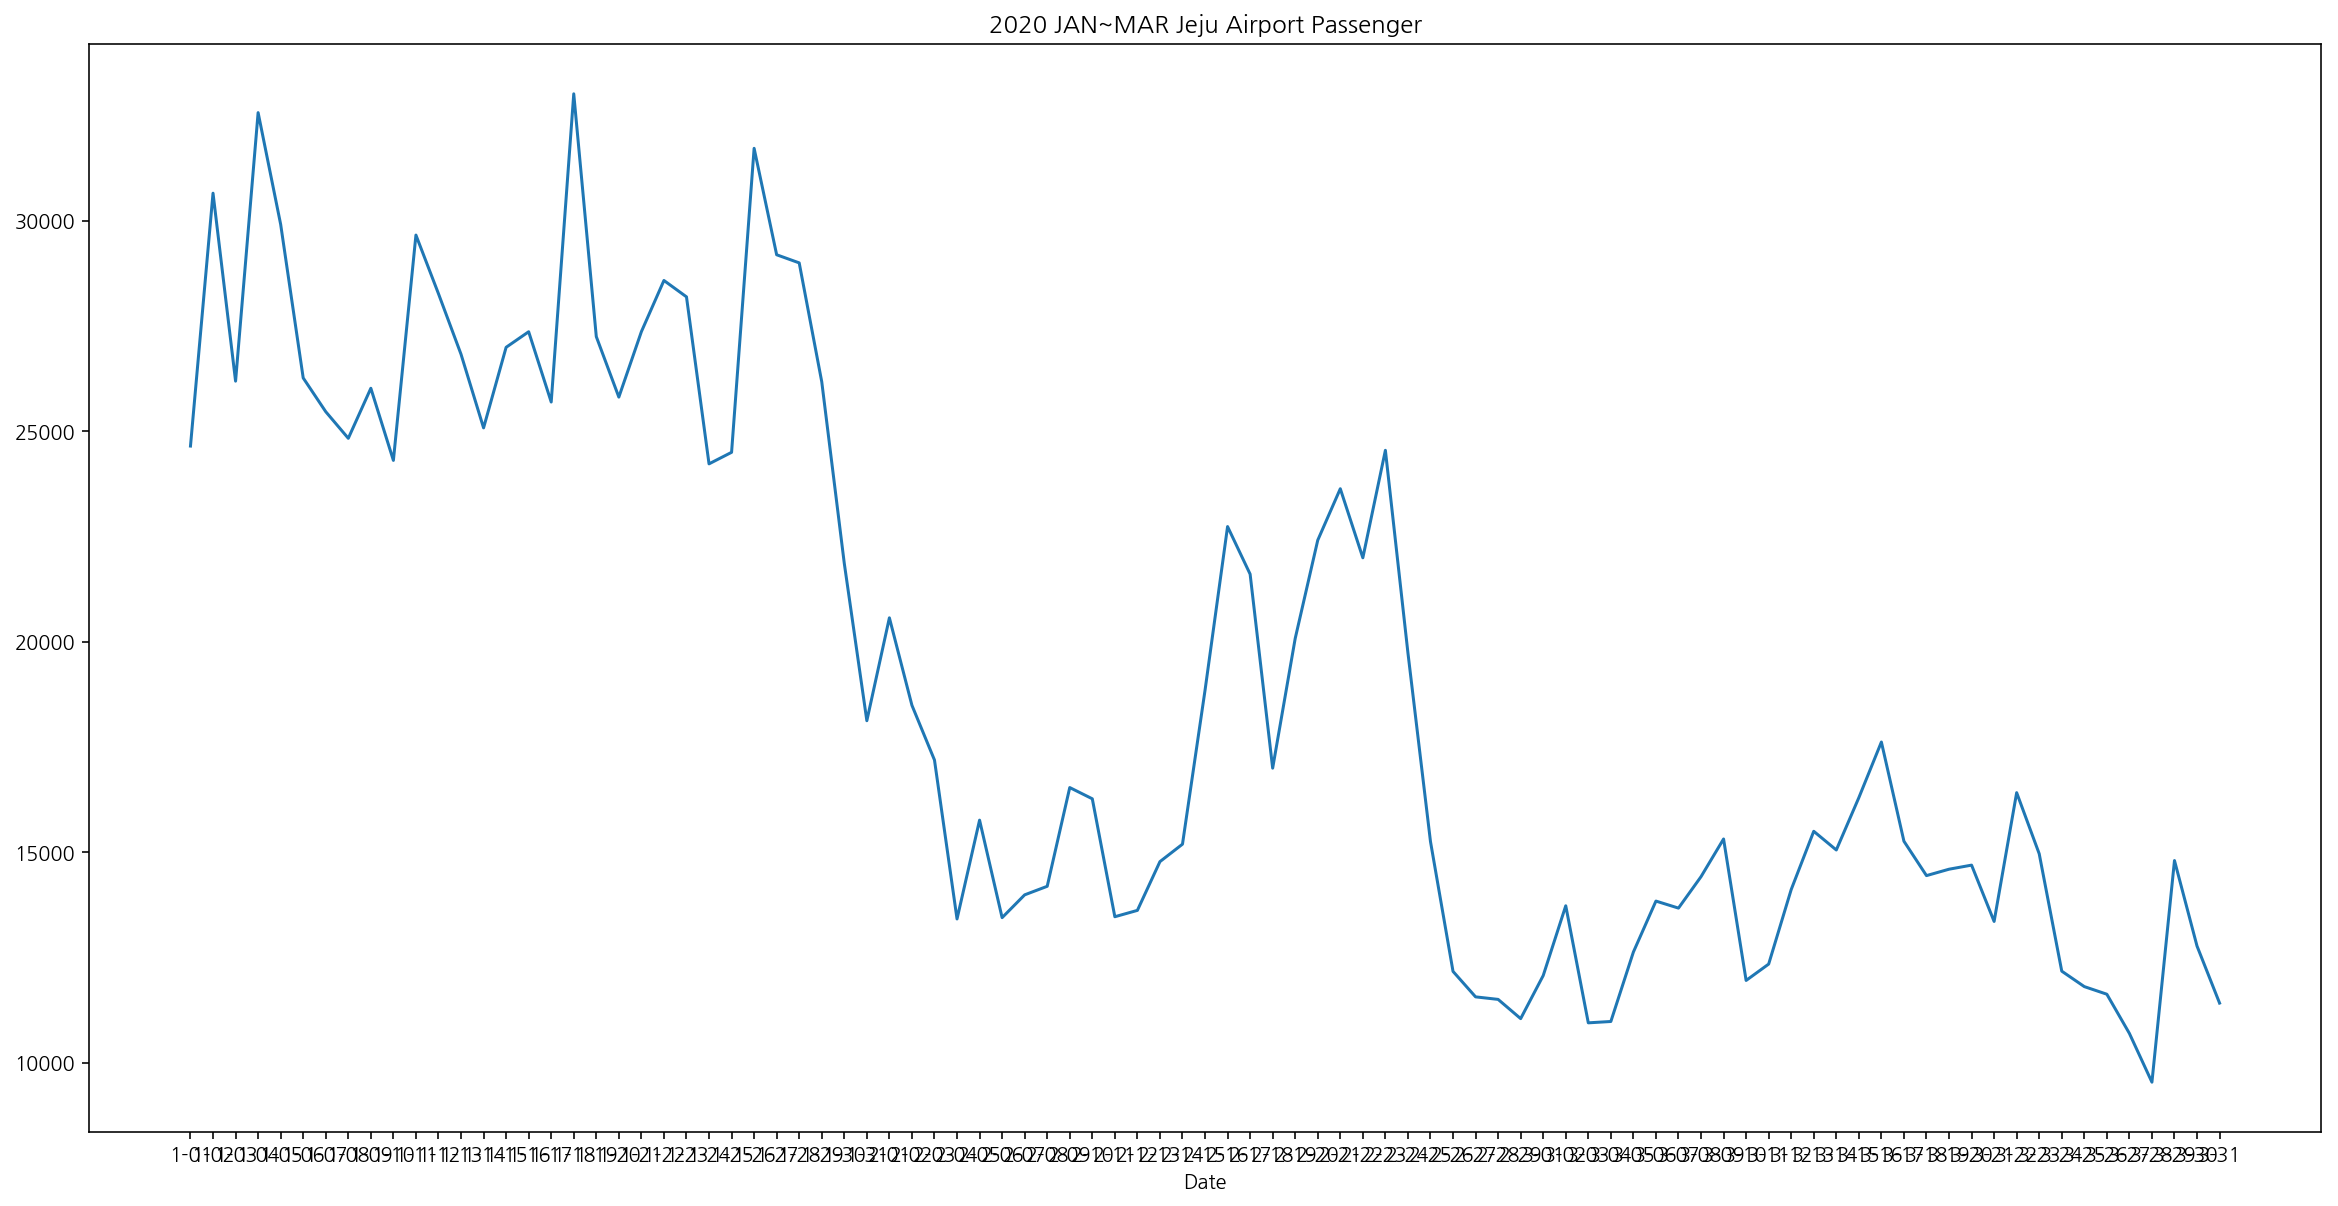

In [29]:
from matplotlib import pyplot as plt
import numpy as np
plt.figure(figsize=(20,10))

x_time = jeju_passenger['date'].str[6]+'-'+ jeju_passenger['date'].str[-2:]
y_passenger = jeju_passenger['passenger']

plt.plot(x_time, y_passenger)

plt.xlabel('Date')
plt.title('2020 JAN~MAR Jeju Airport Passenger')
plt.show()

### 4. 일일 확진자와 제주공항 승객 추이 - 사회적 거리두기 2
TimeGender.csv 파일을 통해 day_count_gender(df, col, new_name) 함수를 구현해서 일일 확진자와 사망자를 얻은 내용이 있다.

In [30]:
day_confirm = pd.read_csv('day_confirm.csv')

In [31]:
day_confirm.head()

,date,day_confirm,day_decease
0,2020-03-02,4212,22
1,2020-03-03,600,6
2,2020-03-04,516,4
3,2020-03-05,438,3
4,2020-03-06,518,7


In [32]:
day_jeju = pd.merge(day_confirm, jeju_passenger, on = 'date')

In [33]:
day_jeju = day_jeju.drop(0)

<Figure size 1080x864 with 0 Axes>

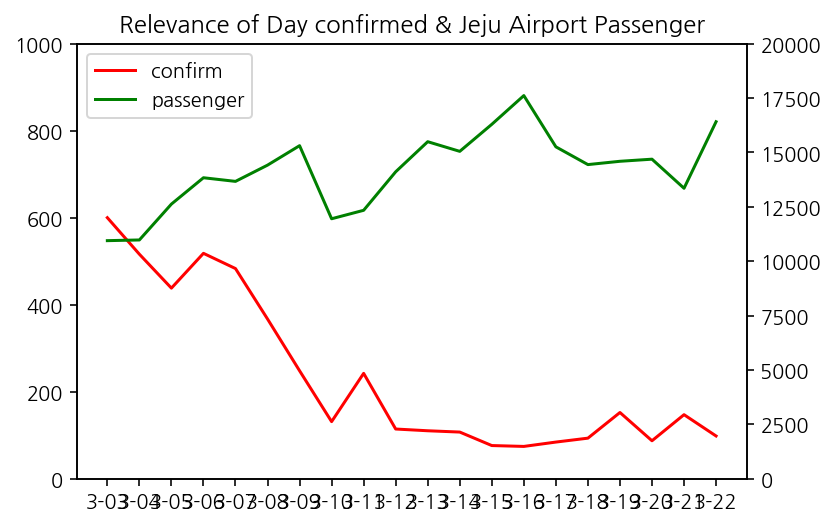

In [34]:
from matplotlib import pyplot as plt
import numpy as np
plt.figure(figsize=(15,12))
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

plt.xticks(np.arange(0, 20))

x_time = day_jeju['date'].str[6]+'-'+ day_jeju['date'].str[-2:]
y_confirm = day_jeju['day_confirm']
y_passenger = day_jeju['passenger']

line1 = ax1.plot(x_time, y_confirm, color = 'r', label='confirm') 
line2 = ax2.plot(x_time, y_passenger, color = 'g', label='passenger') 

ax1.set_ylim(0, 1000)
ax2.set_ylim(0, 20000)

lines = line1 + line2
labels = [l.get_label() for l in lines]
plt.legend(lines, labels,loc = 2)

plt.xlabel('Date')
plt.title('Relevance of Day confirmed & Jeju Airport Passenger')
plt.show()

2월 28일부터 사회적 거리두기가 시행되었다.

앞서 위에서 본 월 평균 자료에서는 2, 3월 시간이 지날수록 승객 수와 항공편 수는 눈에 띄게 줄었다.

그런데 3월의 일간 승객 수는 다르다.

일일별 확진자가 감소하면서 승객은 3월 초에 비해 증가했다.

사회적 거리두기의 실천이 제대로 이루어지지 않는 것 같고 이로 인해 코로나 종식이 쉽지 않다고 판단한다.

## 주가 크롤링 - 항공업계의 위기

이처럼 코로나로 인해 항공업계의 어려움이 눈으로 드러난다.
다음으로 항공사 주가 데이터를 가져와 비교해보려 한다.

KRX에서 2020년 1월부터 3월까지 일일 대한항공 주가 데이터를 받았다.

In [35]:
koreanair = pd.read_csv('koreanair.csv')

In [36]:
koreanair.head()

,년/월/일,종가,대비,거래량(주),거래대금(원),시가,고가,저가,시가총액(백만),상장주식수(주)
0,2020/03/31,"18,700",0,"1,312,182","24,796,408,100","19,150","19,300","18,550","1,773,595","94,844,634"
1,2020/03/30,"18,700",-250,"1,470,195","26,809,437,400","18,000","18,900","17,550","1,773,595","94,844,634"
2,2020/03/27,"18,950",600,"2,633,752","50,401,161,150","19,800","20,100","18,100","1,797,306","94,844,634"
3,2020/03/26,"18,350","1,000","4,960,871","93,940,048,600","18,500","20,200","17,500","1,740,399","94,844,634"
4,2020/03/25,"17,350","2,350","4,564,606","78,793,125,200","16,500","18,100","16,500","1,645,554","94,844,634"


In [37]:
koreanair = koreanair.drop(koreanair.columns[[2,4,5,6,7,8,9]], axis = 1)

In [38]:
koreanair.columns = ['date','price','deal']

In [39]:
koreanair.head()

,date,price,deal
0,2020/03/31,"18,700","1,312,182"
1,2020/03/30,"18,700","1,470,195"
2,2020/03/27,"18,950","2,633,752"
3,2020/03/26,"18,350","4,960,871"
4,2020/03/25,"17,350","4,564,606"


In [40]:
koreanair["date"]=koreanair["date"].str[:4]+"-"+koreanair["date"].str[5:7]+"-"+koreanair["date"].str[-2:]

In [41]:
finance = pd.merge(day_confirm, koreanair, on='date')

In [42]:
finance.head()

,date,day_confirm,day_decease,price,deal
0,2020-03-02,4212,22,"22,300","992,603"
1,2020-03-03,600,6,"22,400","1,010,651"
2,2020-03-04,516,4,"24,000","1,459,603"
3,2020-03-05,438,3,"25,100","2,216,940"
4,2020-03-06,518,7,"23,800","1,520,202"


In [43]:
finance = finance.drop(0)

In [44]:
finance.dtypes

date           object
day_confirm     int64
day_decease     int64
price          object
deal           object
dtype: object

In [45]:
finance['price'] = finance['price'].str.replace(',', '').astype('int64')
finance['deal'] = finance['deal'].str.replace(',', '').astype('int64')

<Figure size 1080x864 with 0 Axes>

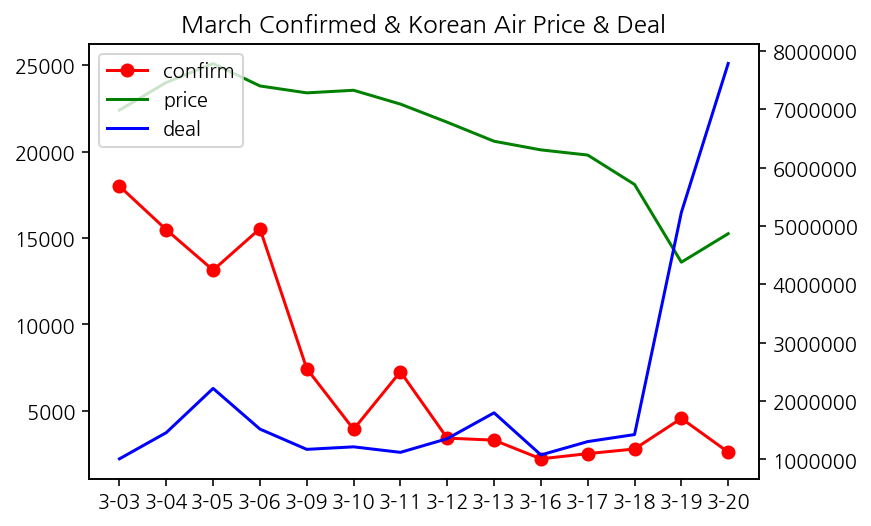

In [46]:
from matplotlib import pyplot as plt
import numpy as np
plt.figure(figsize=(15,12))
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

plt.xticks(np.arange(0, 20))

x_time = finance['date'].str[6]+'-'+ finance['date'].str[-2:]
y_confirm = finance['day_confirm']
y_price = finance['price']
y_deal = finance['deal']

line1 = ax1.plot(x_time, y_confirm*30, color = 'r', marker = 'o', label='confirm') 
line2 = ax1.plot(x_time, y_price, color = 'g', label='price') 
line3 = ax2.plot(x_time, y_deal, color = 'b', label = 'deal')
'''
ax1.set_ylim(0, 1000)
ax2.set_ylim(0, 20000)
'''
lines = line1 + line2 + line3
labels = [l.get_label() for l in lines]
plt.legend(lines, labels,loc = 2)

plt.xlabel('Date')
plt.title('March Confirmed & Korean Air Price & Deal')
plt.show()

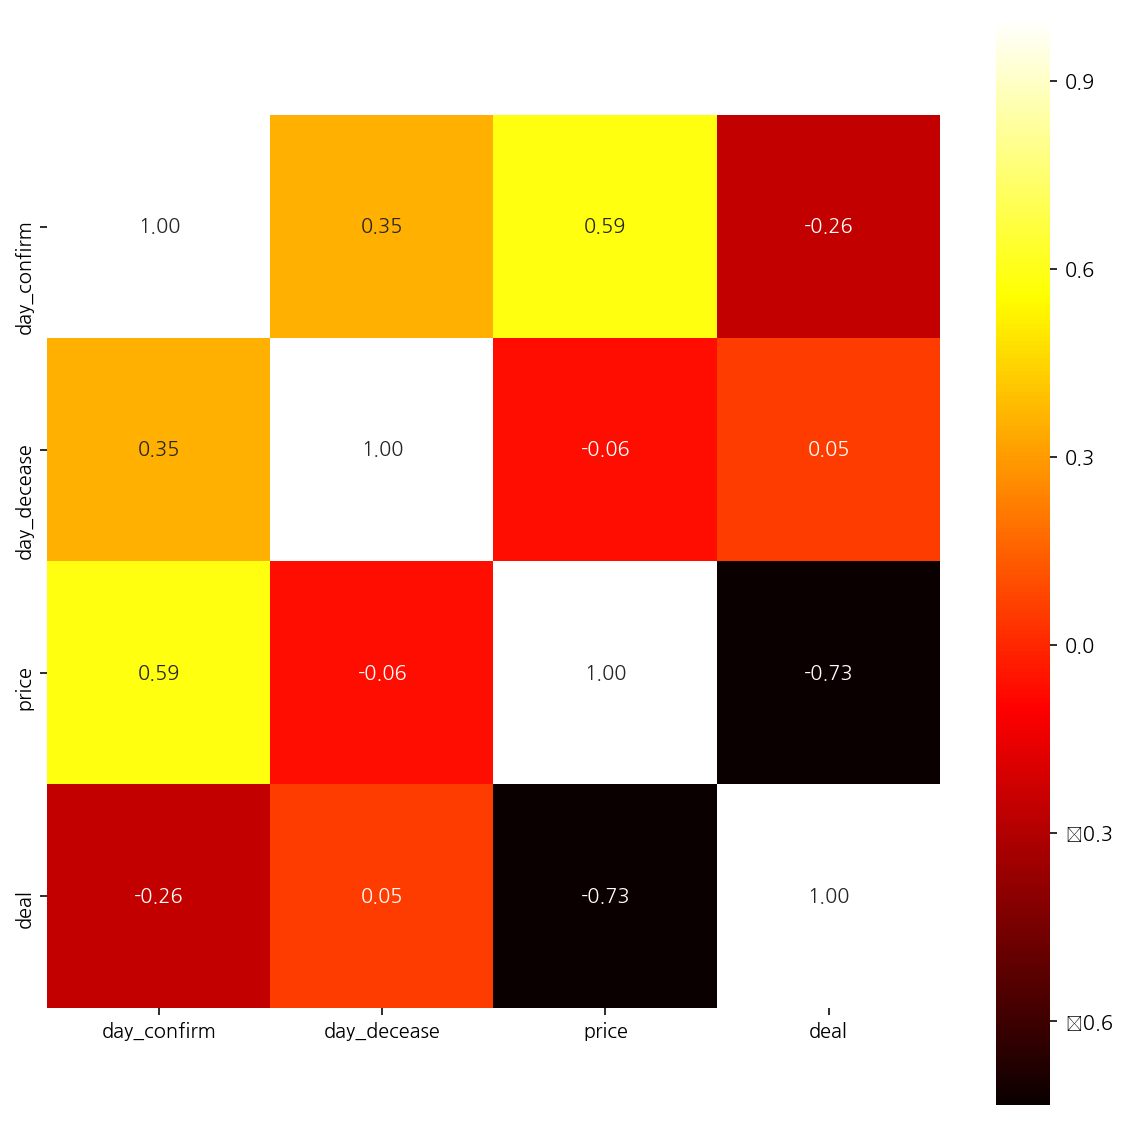

In [47]:
corr = finance.corr()
plt.figure(figsize=(10,10))
df_heatmap = sns.heatmap(corr, cbar = True, annot = True,
                         annot_kws={'size' : 10}, fmt = '.2f', square = True, cmap = 'hot')

확진자의 흐름에 따라 시장가의 흐름도 따라가는 경향성을 보인다.

## 일간 코로나 검색 비율 업데이트 - 사회적 관심

지난 번에는 누적 확진자와 코로나 검색 비율을 같이 비교하다 보니 제대로 비교가 되지 않았다.
그래서 dayconfirm.csv를 이용해서 일일별 신규 확진자와 코로나 검색 비율을 비교했다.

In [48]:
search_trend = pd.read_csv('SearchTrend.csv')

In [49]:
# dayconfirm.csv + SearchTrend.csv
day_search = pd.merge(day_confirm,search_trend, on=['date'])

검색율 비교를 위해 두 데이터 병합을 했다.

In [50]:
day_search = day_search.drop(0)

In [51]:
day_search.head()

,date,day_confirm,day_decease,cold,flu,pneumonia,coronavirus
1,2020-03-03,600,6,0.67934,0.11917,0.39853,47.17367
2,2020-03-04,516,4,0.82579,0.10790,0.35671,39.84053
3,2020-03-05,438,3,0.64916,0.09745,0.31726,33.24218
4,2020-03-06,518,7,0.58625,0.09163,0.28071,29.61647
5,2020-03-07,483,2,0.71743,0.07690,0.22762,26.90492


In [52]:
day_search.dtypes

date            object
day_confirm      int64
day_decease      int64
cold           float64
flu            float64
pneumonia      float64
coronavirus    float64
dtype: object

day_confirm의 1행이 3월까지 확진자가 누적된 것이라 삭제했다.

<Figure size 1080x864 with 0 Axes>

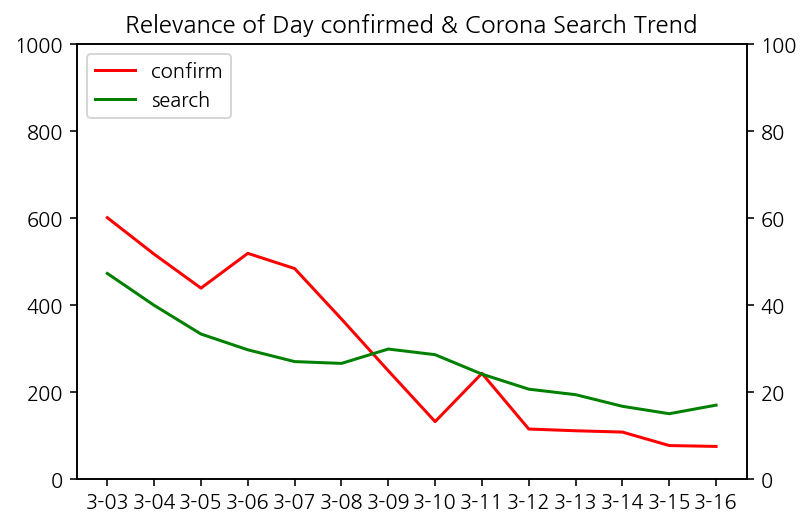

In [53]:
# 확진자와 코로나 검색량 연관성 확인
from matplotlib import pyplot as plt
import numpy as np
plt.figure(figsize=(15,12))
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

plt.xticks(np.arange(0, 20))

x_time = day_search['date'].str[6]+'-'+ day_search['date'].str[-2:]
y_confirm = day_search['day_confirm']
y_corona = day_search['coronavirus']

line1 = ax1.plot(x_time, y_confirm, color = 'r', label='confirm') 
line2 = ax2.plot(x_time, y_corona, color = 'g', label='search')

ax1.set_ylim(0, 1000)
ax2.set_ylim(0, 100)


lines = line1 + line2
labels = [l.get_label() for l in lines]
plt.legend(lines, labels,loc = 2)
plt.xlabel('Date')
plt.title('Relevance of Day confirmed & Corona Search Trend')
plt.show()

확진자의 추세에 따라 코로나 검색율도 비슷하게 따라가는 양상을 보인다.